In [1]:
import sys

sys.path.insert(0, '../../PSC')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PSC import projections
from PSC import utils
from PSC import comparison

INFO: Using numpy backend


# Comparison Visualization

In [4]:
base_alpha = np.array([[1,0],[0,1],[0,0]])

In [5]:
N=3
n=2
k=1
s=100
concentration=0.05
epsilon=0.5

sample=utils.sphere_point_cloud(N,n,s,epsilon, alpha=base_alpha)
print(sample['points'].shape)

(100, 3, 1)


In [6]:
projected = comparison.PSC_points(sample['points'], n)
print(projected[0].shape, projected[1].shape)

Optimizing...
Terminated - min grad norm reached after 10 iterations, 0.01 seconds.

(100, 2, 1) (3, 2)


In [7]:
geodesic_projected = comparison.PGA_points(sample['points'].reshape(s, N), n)
print(geodesic_projected.shape)

(100, 3)


In [8]:
geodesic_projected_mean = comparison.frechetmean(geodesic_projected.reshape(s,N), N, k)
print(geodesic_projected_mean)

[[-0.11360002]
 [-0.29141355]
 [-0.94982797]]


In [9]:
projected_mean=comparison.frechetmean(projected[0].reshape(s,n), n, k)
mean=comparison.frechetmean(sample['points'].reshape(s,N), N, k)
print(projected_mean)
print(mean)

[[-0.60135203]
 [-0.79898419]]
[[-0.11340434]
 [-0.29577047]
 [-0.94850371]]


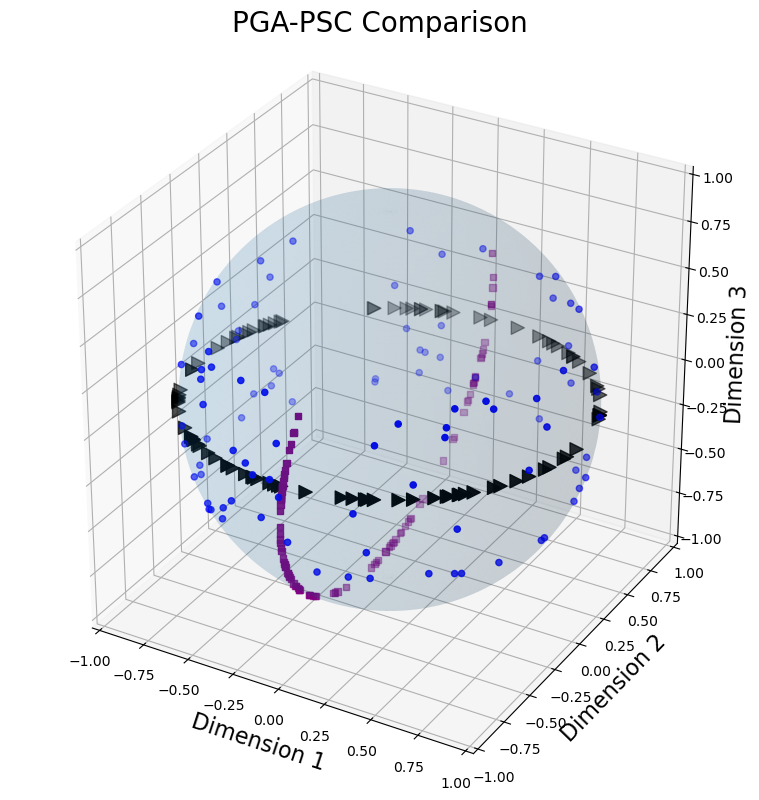

In [10]:
X=projected[1].dot(projected[0]).transpose((1,0,2)) #in black
Y=sample['points'] #in blue
Z=geodesic_projected

title='PGA-PSC Comparison'
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0: 2 * np.pi : 100j, 0: np.pi :100j]
xx = np.cos(u) * np.sin(v)
yy = np.sin(u) * np.sin(v)
zz = np.cos(v)

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.1, linewidth=0)
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='blue', s=20) #Original points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='black', s=90, marker=">") #Stiefel projected
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c='purple', s=20, marker="s") #Geodesic projected
#ax.scatter(geodesic_projected_mean[0], geodesic_projected_mean[1], geodesic_projected_mean[2], c='purple', s=20)
#ax.scatter(projected_mean[0], projected_mean[1], projected_mean[2], c='red', s=20)
#ax.scatter(mean[0], mean[1], mean[2], c='green', s=90, marker=">")
ax.set_xlabel('Dimension 1', fontsize=16)
ax.set_ylabel('Dimension 2', fontsize=16)
ax.set_zlabel('Dimension 3', fontsize=16)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_box_aspect((1,1,1))
plt.title(title, fontsize=20)
plt.tight_layout()
plt.show()

# Explained Variance Comparison with PGA

In [11]:
N=11
n=6
s=200
eps_vec=[0.01,0.05,0.1,0.5]
n_components=5
t=100
var_data = comparison.output_var_df(N, n, s, t, eps_vec, n_components)
var_data.to_pickle("var_data.pkl")

Optimizing...
Terminated - min grad norm reached after 96 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 102 iterations, 0.08 seconds.

Optimizing...


Terminated - min grad norm reached after 58 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 41 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 44 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 283 iterations, 0.19 seconds.



Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 90 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 108 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 115 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 100 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 174 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 102 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 98 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 93 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 87 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 107 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 101 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 109 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.



Optimizing...
Terminated - min grad norm reached after 178 iterations, 0.12 seconds.

Optimizing...


Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 174 iterations, 0.12 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 92 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 115 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 97 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 159 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 120 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 282 iterations, 0.20 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 181 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 105 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 127 iterations, 0.09 seconds.



Optimizing...
Terminated - min grad norm reached after 95 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 138 iterations, 0.09 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seco

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 151 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 148 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 94 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 88 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 83 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterati

Terminated - min grad norm reached after 112 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 88 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 135 iterations, 0.09 seconds.

Optimizing...


Terminated - min grad norm reached after 100 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 163 iterations, 0.12 seconds.



Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 187 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 653 iterations, 0.46 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 116 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 se

Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 95 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 160 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 104 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 144 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 104 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 110 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 90 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 125 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 90 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 141 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 152 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 115 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 76 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 10 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 97 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 119 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 90 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 sec

Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 89 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 88 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 92 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 10 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 77 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seco

Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 121 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 114 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 135 iterations, 0.10 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 93 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 86 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 154 iterations, 0.11 seconds.



Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 108 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 121 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 196 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 236 iterations, 0.17 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 99 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 102 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 138 iterations, 0.10 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 107 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 92 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 128 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 96 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.



Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 87 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 77 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 101 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 152 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 98 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 228 iterations, 0.16 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 110 iterations, 0.08 seconds.

Optimizing...


Terminated - min grad norm reached after 973 iterations, 0.67 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 89 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 98 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 140 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 101 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 99 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 187 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 88 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 111 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 118 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 206 iterations, 0.15 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 94 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 74 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 43 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 10 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 104 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 100 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 109 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 169 iterations, 0.12 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 79 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 97 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 131 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 128 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 90 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 86 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 96 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 100 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 151 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - max iterations reached after 0.67 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 101 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 95 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 103 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterati

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 119 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 178 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 94 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 99 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 91 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 99 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 75 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 155 iterations, 0.11 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 234 iterations, 0.16 seconds.



Optimizing...
Terminated - min grad norm reached after 123 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 221 iterations, 0.16 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 97 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 133 iterations, 0.09 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 121 iterations, 0.09 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 148 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 98 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 115 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 511 iterations, 0.34 seconds.

Optimizing...
Terminated - min grad norm reached after 102 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.



Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 309 iterations, 0.21 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 133 iterations, 0.10 seconds.



Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 42 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 93 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 143 iterations, 0.10 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.



Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 11 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 253 iterations, 0.17 seconds.



Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 164 iterations, 0.11 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 116 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 108 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 182 iterations, 0.13 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 106 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 77 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 107 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 257 iterations, 0.18 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 91 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 100 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 83 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 313 iterations, 0.21 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 86 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 128 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 73 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 134 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 116 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 213 iterations, 0.15 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 108 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 77 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 99 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 204 iterations, 0.14 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 108 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 125 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 134 iterations, 0.10 seconds.

Optimizing...


Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 86 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 122 iterations, 0.09 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 150 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 153 iterations, 0.11 seconds.

Optimizing...


Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 133 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 109 iterations, 0.08 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 77 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 87 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 113 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 116 iterations, 0.08 seconds.



Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 95 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 269 iterations, 0.19 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 108 iterations, 0.08 seconds.



Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 91 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 200 iterations, 0.14 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 124 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 194 itera

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 44 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 127 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 93 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 128 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 92 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 102 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 87 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 150 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 111 iterations, 0.08 seconds.

Optimizing...


Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 147 iterations, 0.10 seconds.



Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 118 iterations, 0.08 seconds.

Optimizing...


Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 180 iterations, 0.12 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 83 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 139 iterations, 0.10 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 91 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 110 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 133 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 77 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 126 iterations, 0.09 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.



Optimizing...


Terminated - min grad norm reached after 360 iterations, 0.25 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 108 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 97 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 177 iterations, 0.12 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 261 iterations, 0.19 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 0.07 seconds.

Optimizing...


Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 130 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 162 iterations, 0.11 seconds.



Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 161 iterations, 0.11 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 10 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 185 iterations, 0.12 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 221 iterations, 0.15 seconds.



Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.



Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 80 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 117 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 28 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 238 iterations, 0.17 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 93 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 29 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 144 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 101 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 306 iterations, 0.22 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 117 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 0.06 seconds.

Optimizing...


Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 22 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 44 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 41 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 30 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 140 iterations, 0.10 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 12 iterations, 0.01 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 187 iterations, 0.13 seconds.



Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 74 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 17 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 19 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 100 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 147 iterations, 0.10 seconds.



Optimizing...
Terminated - min grad norm reached after 90 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 33 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 21 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 37 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 107 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 35 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 0.04 seconds.



Optimizing...
Terminated - min grad norm reached after 63 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 13 iterations, 0.02 seconds.

Optimizing...


Terminated - min grad norm reached after 116 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 94 iterations, 0.07 seconds.



Optimizing...
Terminated - min grad norm reached after 52 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 67 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 32 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 20 iterations, 0.02 seconds.



Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 79 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 31 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 101 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 25 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 53 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 65 iterations, 0.05 seconds.



Optimizing...
Terminated - min grad norm reached after 260 iterations, 0.18 seconds.



Optimizing...
Terminated - min grad norm reached after 15 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 46 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 101 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 42 iterations, 0.03 seconds.



Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 0.05 seconds.

Optimizing...


Terminated - min grad norm reached after 62 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 0.04 seconds.

Optimizing...


Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 144 iterations, 0.09 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.04 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 14 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 114 iterations, 0.08 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 45 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 0.03 seconds.

Optimizing...


Terminated - min grad norm reached after 16 iterations, 0.02 seconds.

Optimizing...
Terminated - min grad norm reached after 78 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 34 iterations, 0.03 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 11 iterations, 0.01 seconds.



In [12]:
#var_data=pd.read_pickle("var_data.pkl")

In [13]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, geom_smooth, facet_grid, facet_wrap, labeller, element_text, theme

def plot_averages(var_data, output="show"):
  averaged_variances = var_data.groupby(['epsilon','dims'],as_index=False)[['PSC','PGA']].mean()
  scores_tall = averaged_variances.melt(id_vars=['dims','epsilon'], value_vars=['PSC','PGA'])
  def epsilon_labels(s):
    return r'$\epsilon$ = ' + str(s)
  plot=(
  ggplot(scores_tall, aes('dims', 'value', color='variable')) + geom_line(size=2)+ facet_wrap('~epsilon', labeller=labeller(cols=epsilon_labels))+labs(x="Principal Components (Dimension)",y="Variance Ratio",color="Method")
  )
  if output=="save":
    plot.save("var_ratio.png")
  else:
    plot.draw(show=True)

In [14]:
plot_averages(var_data, output="save")

/Users/harlinlee/anaconda3/envs/PSC/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/harlinlee/anaconda3/envs/PSC/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: var_ratio.png
INFO: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
